In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
filename = '2.3.Categorical-variables.Visualization-techniques-exercise.xlsx'
xlsx_file = pd.ExcelFile(filename)
res = len(xlsx_file.sheet_names)
print("number of sheets:", res)
xlsx_sheet = pd.read_excel(filename, sheet_name=0)

number of sheets: 4


In [23]:
xlsx_sheet

,Unnamed: 0,Categorical variables. Visualization techniques,Unnamed: 2
0,NaN,Ice cream shop,NaN
1,NaN,NaN,NaN
2,NaN,Note: You may solve these problems both on pap...,NaN
3,NaN,NaN,NaN
4,NaN,Background,"There is an ice cream shop, that is operating ..."
5,NaN,Data,"You have sold 12,327 ice creams in New York; 1..."
6,NaN,Task,Order the data in a frequency distribution table.


In [28]:
#background
background = xlsx_sheet.iloc[4,2:].tolist()[0]
data = xlsx_sheet.iloc[5,2:].tolist()[0]
task = xlsx_sheet.iloc[6,2:].tolist()[0]
print("background: ", background)
print("data: ", data)
print("task: ", task)

background:  There is an ice cream shop, that is operating in New York, LA and San Francisco.
data:  You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.
task:  Order the data in a frequency distribution table.


In [39]:
data = [12237, 17129, 19923]
cities = ['Ny', "La", "Sf"]
df = pd.DataFrame(columns=['Cities','Sales'])
df['Cities'] = cities
df['Sales'] = data
df

,Cities,Sales
0,Ny,12237
1,La,17129
2,Sf,19923


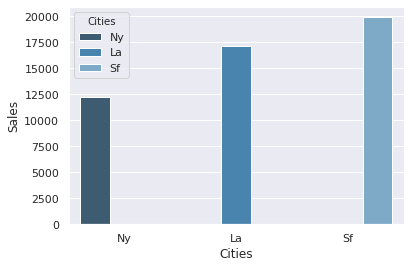

In [46]:
#bar chart 
from numpy import median
ax = sns.barplot(x="Cities", y="Sales", hue="Cities", data=df, ci=68, capsize=.2, palette="Blues_d")

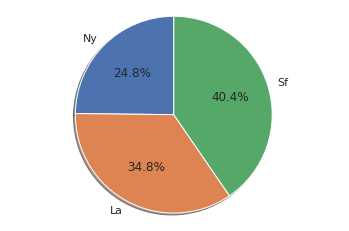

In [47]:
#pie chart
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=cities, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

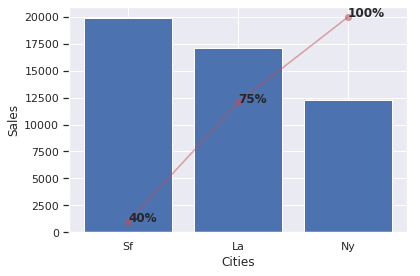

In [52]:
#pareto diagram
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()
pareto_plot(df, x='Cities', y='Sales')